<a href="https://colab.research.google.com/github/Ireneyayyy/demo_wbs/blob/main/Text_Lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preliminaries
In this first session, we will explore some simple text processing of the `babynames` dataset, which contains information on the popularity of baby names in the US from 1880 to 2018.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [6]:
babynames = pd.read_csv('babynames.csv')

One simple thing we can do with text is to measure its length. For example, we can create a new column that contains the number of characters in each baby name.

In [7]:
babynames['namelength'] = babynames['name'].str.len()
print(babynames.head())

   year sex       name     n      prop  namelength
0  1880   F       Mary  7065  0.072384           4
1  1880   F       Anna  2604  0.026679           4
2  1880   F       Emma  2003  0.020521           4
3  1880   F  Elizabeth  1939  0.019866           9
4  1880   F     Minnie  1746  0.017888           6


Another thing we can do with data is to visualize it using plots. For example, we can create a plot that shows how the mean name length has changed over time for males and females. We will use `seaborn`, which is built on top of `matplotlib` and integrates well with `pandas` data frames:

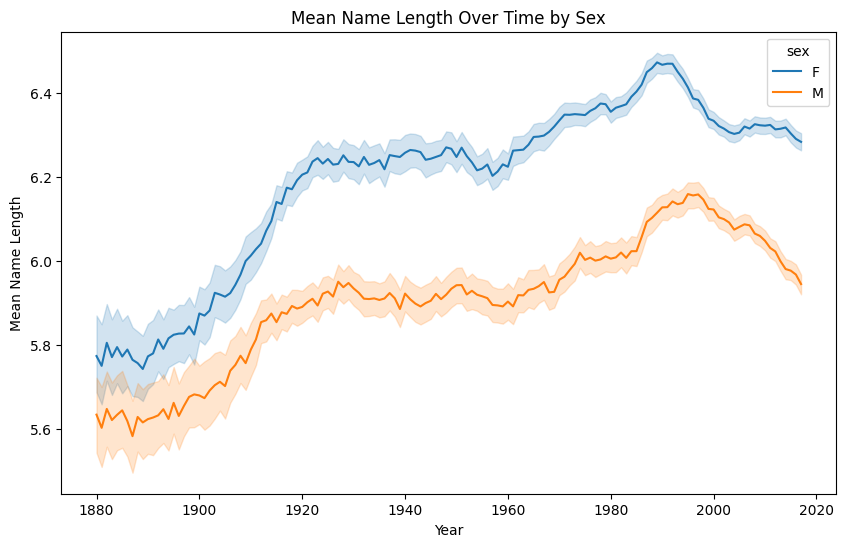

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=babynames, x='year', y='namelength', hue='sex')
plt.xlabel('Year')
plt.ylabel('Mean Name Length')
plt.title('Mean Name Length Over Time by Sex')
plt.show()


# Your Turn
1.	Plot the total number of babies born each year, broken down by gender.
2.	Create a plot with year on the-axis and the most popular female name on the Y-axis.


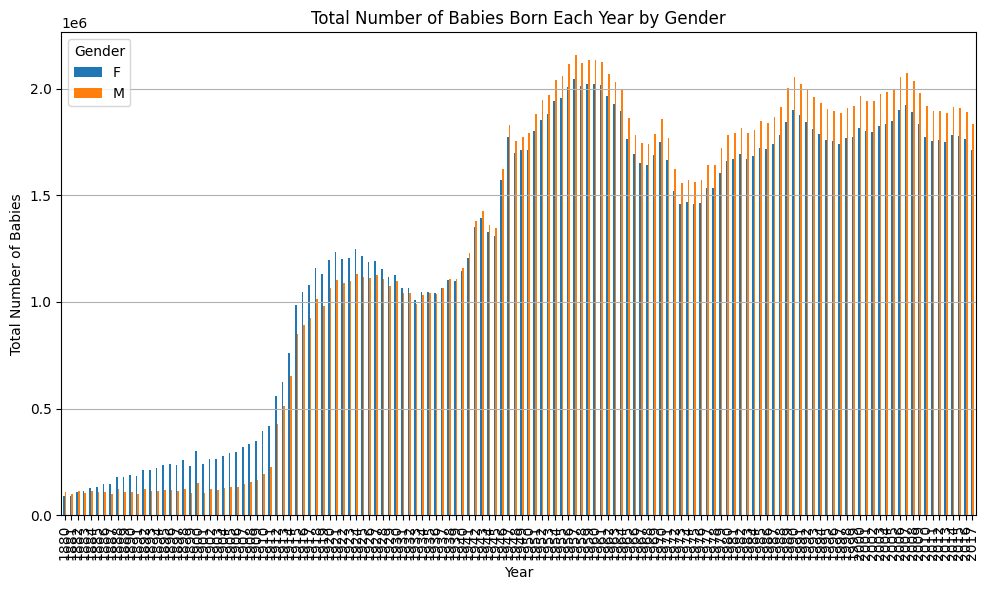

In [9]:
#plot the total number of babies born each year, broken down by gender
# Group by year and sex, and sum the number of babies born
total_babies_by_year_sex = babynames.groupby(['year', 'sex'])['n'].sum().unstack()

# Plotting
total_babies_by_year_sex.plot(kind='bar', figsize=(10, 6))
plt.title('Total Number of Babies Born Each Year by Gender')
plt.xlabel('Year')
plt.ylabel('Total Number of Babies')
plt.legend(title='Gender')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


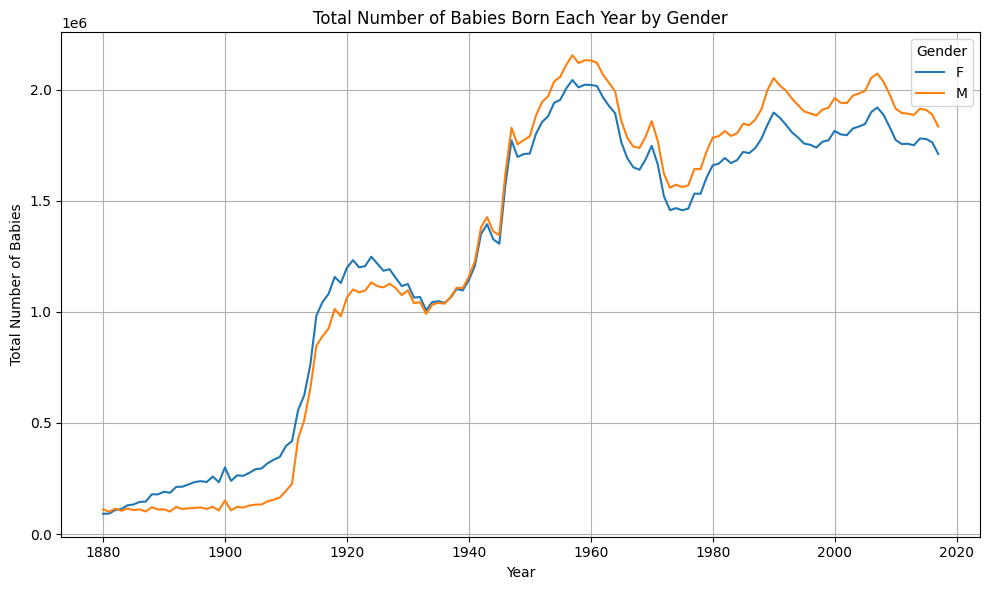

In [11]:
# line graph
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the data loaded into a DataFrame called 'babynames'

# Group by year and sex, and sum the number of babies born
total_babies_by_year_sex = babynames.groupby(['year', 'sex'])['n'].sum().unstack()

# Plotting
total_babies_by_year_sex.plot(kind='line', figsize=(10, 6))
plt.title('Total Number of Babies Born Each Year by Gender')
plt.xlabel('Year')
plt.ylabel('Total Number of Babies')
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()


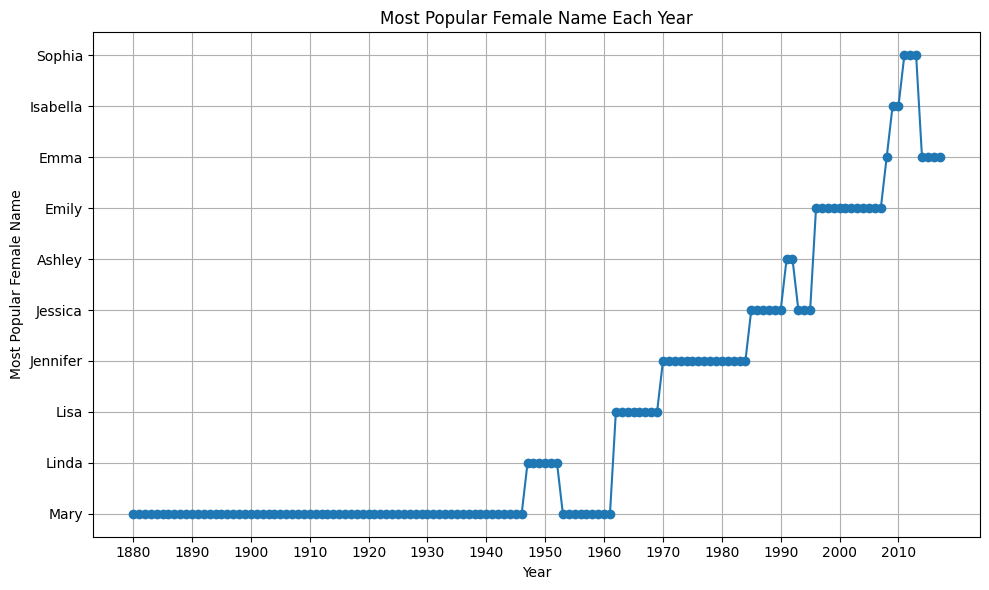

In [12]:
#plot the most popular female babies name

# Filter to include only female names
female_names = babynames[babynames['sex'] == 'F']

# Group by year and name, and sum the number of babies born
total_babies_by_year_name = female_names.groupby(['year', 'name'])['n'].sum().unstack()

# Find the most popular female name for each year
most_popular_names = total_babies_by_year_name.idxmax(axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(most_popular_names.index, most_popular_names.values, marker='o', linestyle='-')
plt.title('Most Popular Female Name Each Year')
plt.xlabel('Year')
plt.ylabel('Most Popular Female Name')
plt.grid(True)
plt.xticks(range(min(most_popular_names.index), max(most_popular_names.index)+1, 10))  # Optional: Adjust x-axis ticks
plt.tight_layout()
plt.show()

# Regular Expression
 A Regular Expression, or RegEx, is a sequence of
characters that specifies a pattern to be searched.
* RegEx is like a mini "programming language" that embedded in
Python, as well as other languages (more or less).
* For example,
```
# \b[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[AZ]{2,}\b
```
 is a regular expression to match valid email addresses.
* Very useful for data collection, extraction and cleaning.
* But requires practice and "trial and error".

## Sets []
[] is used to match a single character specified in the brackets..
* [abcd]: Matches either a, b, c or d. It does not match "abcd".
* [a-d]: Matches any one alphabet from a to d.
* [a-] and [-a] | Matches a or -, because - is not being used to indicate a
series of characters.
* [a-z0-9] | Matches any character from a to z and also from 0 to 9.

[^] is used to match a single character not specified in the brackets
* [^abc] matches any character that is not a, b and c.

## RegEx in Python
Python has build-in module re for regular expression operation.
* `re.findall(A, B)` will matches all instances of a string or an expression A in a string B and returns them in a list.

`print(re.findall("o","I love python"))` # ['o','o']

* Add r before string A to indicate a regular expression.

`print(re.findall(r"[a-p]","I love python"))` # ['l', 'o', 'e', 'p', 'h', 'o', 'n']

`print(re.findall(r"[Iop]","I love python"))` # ['I', 'o', 'p', 'o']

`print(re.findall(r"[o-t][v-z]","I love python"))` # ['ov', 'py']

## Special Sequences
`\w` Matches alphanumeric characters, which means a-z, A-Z, and 0-9. It also
matches the ideogram and underscore, _.

`print(re.findall(r"\w","I love爱 python3"))` # ['I', 'l', 'o', 'v', 'e', '爱', 'p', 'y', 't', 'h', 'o',
'n', '3']

`\W` matches any character not included in `\w`.

`\d` Matches digits, which means 0-9.

`print(re.findall(r"\d","I love python3"))` # ['3']
`print(re.findall(r"\w\d","I love python3"))` #['n3']
`\D` Matches any non-digits.

`print(re.findall(r"\D","I love python3"))` # ['I', ' ', 'l', 'o', 'v', 'e', ' ', 'p', 'y', 't', 'h', 'o',
'n']

## Regular Expression Quantifiers
`*` 0 or more

`+` 1 or more

`?` 0 or 1

`{2}` Exactly 2

`{2,5}` Between 2 and 5

`{2,}` 2 or more

`(,5}` Up to 5

• Find all WBS student ids in a text, such as u1888888.

`re.findall(r'u1\d{6}')`

## Special Characters
`\s` | Matches whitespace characters, which include the \t (tab space),
`\n` (new line), \r (return), and space characters.

`\S` | Matches non-whitespace characters.
`print(re.findall(r"\S","I love python3."))` # ['I', 'l', 'o', 'v', 'e', 'p', 'y', 't', 'h',
'o', 'n', '3', '.']

`\b` | matches the empty string (zero-width character, not blank space)
at the beginning or end, i.e. boundary of a word (\w), in other words,
between \w and \W.

`\B` | matches the any position that is not a word boundary \b.

`print(re.findall(r"\w\b","I, love."))` #['I', 'e']
`print(re.findall(r"\w\B","I, love."))` # ['l', 'o', 'v']
I, love.

## Special Characters
`^` | matches the starting position of the string.
`print(re.findall(r'^\w','I, love, python'))` # ['I']

`$` | matches the ending position of the string.
`print(re.findall(r'\w$','I, love, python'))` # ['n']

`.` | matches any character except line terminators like \n.

`\` | Escapes special characters or denotes character classes.

`A|B` | Matches expression A or B.

• Extract title and last name from column Name as new columns.

```
df_titan.Name.str.extract('\s(\w+)\.')
df_titan['Title'] = df_titan.Name.str.extract('\s(\w+)\.')
df_titan.Name.str.extract('^(\w+),')# NaN
df_titan.Name.str.extract('^([\w\s]+),') #NaN
df_titan.Name.str.extract('^([\w\s\']+),')
df_titan['LastName'] = df_titan.Name.str.extract('^(\D+),')
```



# Resources

Practice regular espressions: [RegExOne](https://regexone.com/)



# Example

We will work with first 5000 rows from the `Reviews.csv` file.

In [10]:
df = pd.read_csv('Reviews.csv',nrows=5000)

In [11]:
df.shape

(5000, 11)

In [12]:
df

,Clothing ID,Age,Title,Review,Rating,Recommended,PositiveFeedbackCount,Division,Department,Class,Date
0,0,26,NaN,NaN,5,1,0,General,Jackets,Outerwear,02/03/2018
1,1,50,Love this under-all cami tank ?,Originally i bought this in black and white. r...,5,1,0,Initmates,Intimate,Layering,07/06/2018
2,1,36,Staple tank!,Love this tank. material and fit are great. lo...,5,1,0,Initmates,Intimate,Layering,01/09/2018
3,1,24,Love but also very annoying,"I love this tank, it is so comfortable but it ...",2,0,1,Initmates,Intimate,Layering,30/06/2018
4,2,28,"Gorgeous top, straps way too long",I just adore this top! it is so comfy and styl...,4,1,0,General,Tops,Knits,18/07/2018
...,...,...,...,...,...,...,...,...,...,...,...
4995,850,60,"Lovely, but it is tight in the chest.",I have to agree with another reviewer that thi...,4,1,3,General Petite,Tops,Blouses,08/03/2018
4996,850,27,Love it,Love it- super cute. can wear it to work with ...,5,1,0,General Petite,Tops,Blouses,04/11/2018
4997,850,42,Too much pep in this peplum...,"I love a good peplum top, and was so excited w...",3,0,1,General Petite,Tops,Blouses,13/02/2018
4998,850,47,Unique and beautiful,This top is beautiful. so beautiful that i am ...,4,1,0,General,Tops,Blouses,28/04/2018


In [13]:
# drop data with missing values in the 'Review' column
df = df.dropna(axis=0, subset=['Review'])
df['Review'].head()

1    Originally i bought this in black and white. r...
2    Love this tank. material and fit are great. lo...
3    I love this tank, it is so comfortable but it ...
4    I just adore this top! it is so comfy and styl...
5    I love this sweater. definite classic. i get l...
Name: Review, dtype: object

In [15]:
# Regex to find positive sentiment words
df['Positive_Sentiments'] = df['Review'].apply(
    lambda x: re.findall(r"\b(love|great|adore|excellent)\b", x, flags=re.IGNORECASE))

<ipython-input-15-845441e545fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Positive_Sentiments'] = df['Review'].apply(


In [16]:
print(df[['Review','Positive_Sentiments']])

                                                 Review  Positive_Sentiments
1     Originally i bought this in black and white. r...        [great, love]
2     Love this tank. material and fit are great. lo...  [Love, great, love]
3     I love this tank, it is so comfortable but it ...               [love]
4     I just adore this top! it is so comfy and styl...              [adore]
5     I love this sweater. definite classic. i get l...               [love]
...                                                 ...                  ...
4995  I have to agree with another reviewer that thi...                   []
4996  Love it- super cute. can wear it to work with ...        [Love, great]
4997  I love a good peplum top, and was so excited w...               [love]
4998  This top is beautiful. so beautiful that i am ...                   []
4999  This top is really beautiful. my girlfriend sa...                   []

[4803 rows x 2 columns]


In [17]:
# Regex to find mentioned prices
df['Prices'] = df['Review'].apply(
    lambda x: re.findall(r"\$\d+(\.\d{1,2})?", x))

<ipython-input-17-351121f25e3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prices'] = df['Review'].apply(


In [18]:
df[['Review','Prices']]

,Review,Prices
1,Originally i bought this in black and white. r...,[]
2,Love this tank. material and fit are great. lo...,[]
3,"I love this tank, it is so comfortable but it ...",[]
4,I just adore this top! it is so comfy and styl...,[]
5,I love this sweater. definite classic. i get l...,[]
...,...,...
4995,I have to agree with another reviewer that thi...,[]
4996,Love it- super cute. can wear it to work with ...,[]
4997,"I love a good peplum top, and was so excited w...",[]
4998,This top is beautiful. so beautiful that i am ...,[]


In [19]:
# Count how many reviews have at least one price mentioned
number_of_reviews_with_prices = df['Prices'].apply(lambda x: len(x) > 0).sum()

print(f"Number of reviews mentioning prices: {number_of_reviews_with_prices}")

Number of reviews mentioning prices: 39


# Your Turn
1. Find all mentions of the words 'refund' or 'late delivery'
2. Find all hashtags (they start with #).

In [36]:
# Find all reviews containing the word 'refund' (case-insensitive)
df['Refund'] = df['Review'].apply(lambda x: re.findall(r"refund", x, flags=re.IGNORECASE))

# Find all reviews containing the word 'delivery' (case-insensitive)
df['Delivery'] = df['Review'].apply(lambda x: re.findall(r"delivery", x, flags=re.IGNORECASE))

<ipython-input-36-d89c7e01ce1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Refund'] = df['Review'].apply(lambda x: re.findall(r"refund", x, flags=re.IGNORECASE))
<ipython-input-36-d89c7e01ce1e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Delivery'] = df['Review'].apply(lambda x: re.findall(r"delivery", x, flags=re.IGNORECASE))


In [37]:
print(df[['Review','Refund','Delivery']])

                                                 Review Refund Delivery
1     Originally i bought this in black and white. r...     []       []
2     Love this tank. material and fit are great. lo...     []       []
3     I love this tank, it is so comfortable but it ...     []       []
4     I just adore this top! it is so comfy and styl...     []       []
5     I love this sweater. definite classic. i get l...     []       []
...                                                 ...    ...      ...
4995  I have to agree with another reviewer that thi...     []       []
4996  Love it- super cute. can wear it to work with ...     []       []
4997  I love a good peplum top, and was so excited w...     []       []
4998  This top is beautiful. so beautiful that i am ...     []       []
4999  This top is really beautiful. my girlfriend sa...     []       []

[4803 rows x 3 columns]


In [38]:
# Count how many reviews have at least one price mentioned
number_of_reviews_with_refund = df['Refund'].apply(lambda x: len(x) > 0).sum()

print(f"Number of reviews mentioning refund: {number_of_reviews_with_refund}")

# Count how many reviews have at least one price mentioned
number_of_reviews_with_delivery = df['Delivery'].apply(lambda x: len(x) > 0).sum()

print(f"Number of reviews mentioning delivery: {number_of_reviews_with_delivery}")

Number of reviews mentioning refund: 0
Number of reviews mentioning delivery: 1


In [40]:
# Filter the DataFrame to get reviews mentioning delivery
reviews_with_delivery = df[df['Delivery'].apply(lambda x: len(x) > 0)]['Review']

# Print the reviews mentioning delivery
for review in reviews_with_delivery:
    print(review)

I ordered  flora nikrooz for my daughter for her wedding.  it is beautiful. the delivery was quick!!! very happy.


In [43]:
# Define a function to find all hashtags in a review
def find_hashtags(review):
    return re.findall(r"#\w+", review)

# Apply the function to each review and store the result in a new column 'Hashtags'
df['Hashtags'] = df['Review'].apply(find_hashtags)

# Count how many reviews have at least one price mentioned
number_of_reviews_with_hashtags = df['Hashtags'].apply(lambda x: len(x) > 0).sum()

print(f"Number of hashtags mentioning refund: {number_of_reviews_with_hashtags}")

# Print the reviews along with their hashtags
for index, row in df.iterrows():
    if row['Hashtags']:
        print(f"Review: {row['Review']}")
        print(f"Hashtags: {row['Hashtags']}")
        print()

<ipython-input-43-f4cbaf93a3cb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hashtags'] = df['Review'].apply(find_hashtags)


Number of hashtags mentioning refund: 16
Review: Bought this as "transitional" wear post baby #2 & i love them! will probably end up wearing them all winter long! i love that i'm 6 foot & they still are scrunchy at the bottom which i honestly wasn't expecting.
Hashtags: ['#2']

Review: This is so ridiculously soft and conformable. it can be worn over workout clothes, or with skinnies or leggings. it looks fabulous either way. i wear mine the way the customer photo #2 is shown: meaning, folded over. but it looks great either way. the green is such a nice neutral: it looks great with black or shades of brown, tan, or even grey. the functional pockets are such a nice touch.
----------
my only "criticism" is this is a dolman-style/drop hem sleeve, which i am not a huge fan of - bu
Hashtags: ['#2']

Review: Around 5 years ago, i bought 4 pairs of "daughters of the liberation" brand (very similar style) shorts at retailer, and have been repairing any and all frayed fabric in the first two pa

# Another Example

In [44]:
df = pd.read_csv('oct_delta.csv')


In [45]:
df.columns

Index(['weekday', 'month', 'date', 'year', 'text'], dtype='object')

In [46]:
# Regex to find twitter handles
pattern = r"@\w+"
df['handle'] = df['text'].dropna().apply(
    lambda x: re.findall(pattern, x))
print(df[['handle']])

              handle
0          [@mjdout]
1        [@rmarkerm]
2        [@checho85]
3          [@nealaa]
4          [@nealaa]
...              ...
1372       [@satijp]
1373  [@lukenbaugh1]
1374     [@jeffcarp]
1375     [@jeffcarp]
1376    [@svchappel]

[1377 rows x 1 columns]


In [47]:
# Regex to capture phone numbers
pattern = r"(?:\+?1\s*)?(?:\(\s*\d{3}\s*\)|\d{3})(?:[\s.-]*\d{3})[\s.-]*\d{4}"
df['phone'] = df['text'].dropna().apply(
    lambda x: re.findall(pattern, x))
df[['phone']]

,phone
0,[]
1,[]
2,[]
3,[]
4,[]
...,...
1372,[]
1373,[]
1374,[]
1375,[]


In [48]:
df_filtered = df[df['phone'].apply(lambda x: x != [])]
df_filtered

,weekday,month,date,year,text,handle,phone
6,Thu,Oct,1,2015,@BigGucciQueen This is your direct dial numbe...,[@BigGucciQueen],[1 360 277 3461]
27,Thu,Oct,1,2015,@i_am_rao You may wish to speak with our Onlin...,[@i_am_rao],[888 750 3284]
40,Thu,Oct,1,2015,@daniellecalder ...at 1-888-750-3284. *BB 2/2,[@daniellecalder],[888-750-3284]
47,Thu,Oct,1,2015,"@mglacey Hi, Mitch. We haven't received any co...",[@mglacey],[888-750-3284]
96,Fri,Oct,2,2015,"@missmelon Hello, Helen. I recommend contactin...",[@missmelon],[800-221-1212]
...,...,...,...,...,...,...,...
1276,Wed,Oct,14,2015,"@matthewtwill Hi Matt, pls reach out to our R...",[@matthewtwill],[800-221-1212]
1347,Thu,Oct,15,2015,"@KerKilbourne ...facilities, contact Standard ...",[@KerKilbourne],[773-686-6148]
1348,Thu,Oct,15,2015,"@KerKilbourne ...security screening locations,...",[@KerKilbourne],"[773-601-1817, 773-686-7532]"
1349,Thu,Oct,15,2015,@KerKilbourne Hi. If the bag was lost In the p...,[@KerKilbourne],"[773-686-2385, 773-377-1210]"


In [49]:
# Regex to capture web addresses
pattern = r"https?:\/\/(?:www\.)?\S+\.\S+"
df['web'] =df['text'].dropna().apply(
    lambda x: re.findall(pattern, x))

In [50]:
df_filtered = df[df['web'].apply(lambda x: x != [])]
df_filtered

,weekday,month,date,year,text,handle,phone,web
3,Thu,Oct,1,2015,"@nealaa ...Alerts, pls check here: http://t.co...",[@nealaa],[],[http://t.co/0jlcZnT95Q]
91,Fri,Oct,2,2015,@owroc ...http://t.co/sNIn5Equux *AA 2/2,[@owroc],[],[http://t.co/sNIn5Equux]
111,Fri,Oct,2,2015,@quidaguis ...additional information about the...,[@quidaguis],[],[http://t.co/oKK9xP6hxa.]
124,Fri,Oct,2,2015,@SweetMandisa21 ...http://t.co/rKwjYwO72S *AB 2/2,[@SweetMandisa21],[],[http://t.co/rKwjYwO72S]
202,Sat,Oct,3,2015,@FotosOnTheRoad ...notifications using this li...,[@FotosOnTheRoad],[],[http://t.co/Dp9tC5VSuP]
250,Sat,Oct,3,2015,@multitaskerkate Please see this link for more...,[@multitaskerkate],[],[http://t.co/WOb0KwIle2.]
253,Sat,Oct,3,2015,"@IntegraalMD Mt apologies, Mr. Bonnin. Here is...",[@IntegraalMD],[],[http://t.co/gZa1XM7gct.]
290,Sun,Oct,4,2015,@MClark_Live ...http://t.co/ss99Yr9uYU *RS 2/2,[@MClark_Live],[],[http://t.co/ss99Yr9uYU]
320,Sun,Oct,4,2015,"@DaleLips Hi Dale! Currently, flts will depart...",[@DaleLips],[],[http://t.co/epU2KKNggx]
322,Sun,Oct,4,2015,@ChipRitter ...must apply for TSA PreCheck in ...,[@ChipRitter],[],[http://t.co/aRbJXOkoiY]


# Your Turn
Read the `fakenews.csv` file.
1. Find all mentions of Prince Harry.
2. Find all mentions of Prince Harry that is fake news.
3. Find all phonenumbers.

In [51]:
df = pd.read_csv('fakenews.csv')

<ipython-input-51-8c3a2549d328>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,26

In [54]:
df.columns

Index(['text', 'label', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 417', 'Unnamed: 418', 'Unnamed: 419', 'Unnamed: 420',
       'Unnamed: 421', 'Unnamed: 422', 'Unnamed: 423', 'Unnamed: 424',
       'Unnamed: 425', 'Unnamed: 426'],
      dtype='object', length=427)

In [56]:
# Filter unnamed columns
unnamed_columns = [col for col in df.columns if 'Unnamed' in col]

# Drop unnamed columns
df.drop(columns=unnamed_columns, inplace=True)

In [58]:
df.columns
df.head()

,text,label
0,Get the latest from TODAY Sign up for our news...,1
1,2d Conan On The Funeral Trump Will Be Invited...,1
2,It’s safe to say that Instagram Stories has fa...,0
3,Much like a certain Amazon goddess with a lass...,0
4,At a time when the perfect outfit is just one ...,0


In [59]:
# Define a function to find all mentions of "Prince Harry" in a text
def find_prince_harry(text):
    return re.findall(r"Prince Harry", text)

# Apply the function to each text and store the result in a new column 'Prince Harry Mentions'
df['Prince Harry Mentions'] = df['text'].apply(find_prince_harry)

# Now you can access the mentions of Prince Harry in the 'Prince Harry Mentions' column

In [62]:
# Count how many reviews have at least one price mentioned
number_of_pince_harry_mentioned = df['Prince Harry Mentions'].apply(lambda x: len(x) > 0).sum()

print(f"Number of Prince Harry mentioned: {number_of_pince_harry_mentioned}")

# Print the reviews along with their hashtags
for index, row in df.iterrows():
    if row['Prince Harry Mentions']:
        print(f"text: {row['text']}")
        print(f"Prince Harry Mentions: {row['Prince Harry Mentions']}")
        print()

Number of Prince Harry mentioned: 211
text: Prince William is going to be an uncle and Duchess Kate, an aunt! This morning, Prince Harry and Meghan Markle announced the news that they are expecting their first child together.  "Their Royal Highnesses The Duke and Duchess of Sussex are very pleased to announce that The Duchess of Sussex is expecting a baby in the Spring of 2019," reads a Tweet from Kensington Palace, released before the Duke and Duchess officially kicked off their royal tour of Australia, New Zealand, Fiji, and Tonga.  "Their Royal Highnesses have appreciated all of the support they have received from people around the world since their wedding in May and are delighted to be able to share this happy news with the public."  A spokesperson also revealed that the Duke and Duchess of Cambridge "are delighted for the couple and were able to congratulate them on Friday at the wedding in person."    Several members of the royal family including the Queen and Prince Charles sha

In [63]:
# Filter the DataFrame to get rows where the label is 1 (indicating fake news)
fake_news_df = df[df['label'] == 1]

# Define a function to find all mentions of "Prince Harry" in a text
def find_prince_harry(text):
    return re.findall(r"Prince Harry", text)

# Apply the function to each text in the filtered DataFrame
fake_news_df['Prince Harry Mentions'] = fake_news_df['text'].apply(find_prince_harry)

# Now you can access the mentions of Prince Harry in the filtered DataFrame


<ipython-input-63-f32f6dd6d631>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news_df['Prince Harry Mentions'] = fake_news_df['text'].apply(find_prince_harry)


In [64]:
# Count how many reviews have at least one price mentioned
number_of_pince_harry_mentioned = fake_news_df['Prince Harry Mentions'].apply(lambda x: len(x) > 0).sum()

print(f"Number of Prince Harry mentioned: {number_of_pince_harry_mentioned}")

# Print the reviews along with their hashtags
for index, row in fake_news_df.iterrows():
    if row['Prince Harry Mentions']:
        print(f"text: {row['text']}")
        print(f"Prince Harry Mentions: {row['Prince Harry Mentions']}")
        print()

Number of Prince Harry mentioned: 61
text: Don’t get us wrong: There’s no truth to those rumors that Meghan Markle and Kate Middleton's relationship is rocky. The two, who are set to be sisters-in-law when Markle marries Prince Harry in May, are certainly amicable. But there’s a difference between being friendly and being inseparable.  “I think they are certainly friendly and they are spending more time with each other. You know they’re neighbors in Kensington Palace and I know that Meghan enjoys going over to see Kate and the children, and she does enjoy that. I’m told there’s always an open invitation for her to be with Kate ever when she wants,” royal expert and author of Harry: Life, Loss, and Love told InStyle. “I think that any animosity is probably a fabrication in the press. I’ve never heard to suggest that they don’t get along.”  CHRIS JACKSON/AFP/Getty Images  You’re right if you could hear the “but” coming, though.  “I do hear plenty to suggest that they’re quite different p

In [66]:
# Regex to capture phone numbers
pattern = r"(?:\+?1\s*)?(?:\(\s*\d{3}\s*\)|\d{3})(?:[\s.-]*\d{3})[\s.-]*\d{4}"
df['phone'] = df['text'].dropna().apply(
    lambda x: re.findall(pattern, x))
df[['phone']]

,phone
0,[]
1,[]
2,[]
3,[]
4,[]
...,...
4907,[]
4908,[]
4909,[]
4910,[]


In [67]:
df_filtered = df[df['phone'].apply(lambda x: x != [])]
df_filtered

,text,label,Prince Harry Mentions,phone
7,"On March 24, 2018, one month and ten days afte...",1,[],"[202-671-6529, 202-671-6522, 202-671-6511]"
38,"Television networks, viewers, readers and rest...",0,[],[800-273-8255]
71,Need help? Contact the CQ Hotline at (800) 678...,0,[],[(800) 678-8511]
117,"CLOSE From the highly-anticipated ""She-Ra"" reb...",0,[],[1844298002]
274,Kim Kardashian and Kanye West are no longer sl...,1,[],[800-344-9598]
...,...,...,...,...
4805,"March 10, 2018President Trump in Moon Township...",0,[],[2018031022]
4826,Services for KentuckyIt is an absolute honor t...,0,[],[(270) 782-8303]
4892,Need help? Contact the CQ Hotline at (800) 678...,0,[],[(800) 678-8511]
4894,The teaser poster from 'Aladdin' (Photo: WALT ...,0,[],[1595105002]


# Testing regex

In [ ]:
text = "Contact numbers are 415-555-1234, (416)555-3456, 202 555 4567, 4035555678, and 1 416 555 9292."
pattern = r"(?:\+?1\s*)?(?:\(\s*\d{3}\s*\)|\d{3})(?:[\s.-]*\d{3})[\s.-]*\d{4}"
matches = re.findall(pattern, text)
print(matches)


['415-555-1234', '(416)555-3456', '202 555 4567', '4035555678', '1 416 555 9292']


In [ ]:
text = """
Visit our site at http://www.example.com for more information.
Alternatively, check our support page at https://support.example-site.com/help.
You can also engage with our community at www.community-forum.org.
"""
pattern = r"https?:\/\/(?:www\.)?\S+\.\S+"
matches = re.findall(pattern, text)

print(matches)


['http://www.example.com', 'https://support.example-site.com/help.']
